# Ranking

## Install packages

In [1]:
import sys

In [ ]:
!tar -czf archive.tar.gz 

In [2]:
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 18.9MB 2.2MB/s eta 0:00:01 0% |▎                               | 163kB 6.1MB/s eta 0:00:04    3% |█                               | 624kB 10.1MB/s eta 0:00:02    14% |████▊                           | 2.8MB 22.9MB/s eta 0:00:01    20% |██████▋                         | 3.9MB 24.2MB/s eta 0:00:01    41% |█████████████▎                  | 7.8MB 26.0MB/s eta 0:00:01    48% |███████████████▍                | 9.1MB 25.0MB/s eta 0:00:01    55% |█████████████████▋              | 10.4MB 27.3MB/s eta 0:00:01    88% |████████████████████████████▍   | 16.8MB 25.8MB/s eta 0:00:01
    100% |████████████████████████████████| 880kB 14.2MB/s ta 0:00:01
    100% |████████████████████████████████| 12.2MB 2.8MB/s eta 0:00:01   25% |████████▎                       | 3.2MB 25.4MB/s eta 0:00:01    45% |██████████████▋                 | 5.6MB 24.5MB/s eta 0:00:01    75% |████████████████████████        | 9.1MB 25.0MB/s eta 0:00:01    84% |██████████████████████████

    100% |████████████████████████████████| 81kB 10.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for alphalens ... done
  Stored in directory: /root/.cache/pip/wheels/77/1e/9a/223b4c94d7f564f25d94b48ca5b9c53e3034016ece3fd8c8c1
  Running setup.py bdist_wheel for cvxpy ... done
  Stored in directory: /root/.cache/pip/wheels/2b/60/0b/0c2596528665e21d698d6f84a3406c52044c7b4ca6ac737cf3
  Running setup.py bdist_wheel for pandas ... done
  Stored in directory: /root/.cache/pip/wheels/a3/08/c3/8fdd52954d4b415624cff43c6dd32a22bac90306976a98f4af
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /root/.cache/pip/wheels/98/54/81/dd92d5b0858fac680cd7bdb8800eb26c001dd9f5dc8b1bc0ba
  Running setup.py bdist_wheel for zipline ... done
  Stored in directory: /root/.cache/pip/wheels/5d/20/7d/b48368c8634b1cb6cc7232833b2780a265d4217c0ad2e3d24c
  Running setup.py bdist_wheel for scs ... done
  Stored in directory: /root/.cache/pip/wheels/df/d0/79/37ea880586da03c620ca9ecd5e42adbd86

In [3]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time
import os
import quiz_helper
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

### data bundle

In [5]:
import os
import quiz_helper
from zipline.data import bundles

In [6]:
os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), '..', '..','data','module_4_quizzes_eod')
ingest_func = bundles.csvdir.csvdir_equities(['daily'], quiz_helper.EOD_BUNDLE_NAME)
bundles.register(quiz_helper.EOD_BUNDLE_NAME, ingest_func)
print('Data Registered')

Data Registered


### Build pipeline engine

In [7]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

universe = AverageDollarVolume(window_length=120).top(500) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load(quiz_helper.EOD_BUNDLE_NAME)
engine = quiz_helper.build_pipeline_engine(bundle_data, trading_calendar)

### View Data¶
With the pipeline engine built, let's get the stocks at the end of the period in the universe we're using. We'll use these tickers to generate the returns data for the our risk model.

In [9]:
universe_end_date = pd.Timestamp('2016-01-05', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
universe_tickers

[Equity(0 [A]),
 Equity(1 [AAL]),
 Equity(2 [AAP]),
 Equity(3 [AAPL]),
 Equity(4 [ABBV]),
 Equity(5 [ABC]),
 Equity(6 [ABT]),
 Equity(7 [ACN]),
 Equity(8 [ADBE]),
 Equity(9 [ADI]),
 Equity(10 [ADM]),
 Equity(11 [ADP]),
 Equity(12 [ADS]),
 Equity(13 [ADSK]),
 Equity(14 [AEE]),
 Equity(15 [AEP]),
 Equity(16 [AES]),
 Equity(17 [AET]),
 Equity(18 [AFL]),
 Equity(19 [AGN]),
 Equity(20 [AIG]),
 Equity(21 [AIV]),
 Equity(22 [AIZ]),
 Equity(23 [AJG]),
 Equity(24 [AKAM]),
 Equity(25 [ALB]),
 Equity(26 [ALGN]),
 Equity(27 [ALK]),
 Equity(28 [ALL]),
 Equity(29 [ALLE]),
 Equity(30 [ALXN]),
 Equity(31 [AMAT]),
 Equity(32 [AMD]),
 Equity(33 [AME]),
 Equity(34 [AMG]),
 Equity(35 [AMGN]),
 Equity(36 [AMP]),
 Equity(37 [AMT]),
 Equity(38 [AMZN]),
 Equity(39 [ANDV]),
 Equity(40 [ANSS]),
 Equity(41 [ANTM]),
 Equity(42 [AON]),
 Equity(43 [AOS]),
 Equity(44 [APA]),
 Equity(45 [APC]),
 Equity(46 [APD]),
 Equity(47 [APH]),
 Equity(48 [ARE]),
 Equity(49 [ARNC]),
 Equity(50 [ATVI]),
 Equity(51 [AVB]),
 Equity(

# Get Returns data

In [10]:
from zipline.data.data_portal import DataPortal

data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

## Get pricing data helper function

In [11]:
def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

## get pricing data into a dataframe

In [12]:
returns_df = \
    get_pricing(
        data_portal,
        trading_calendar,
        universe_tickers,
        universe_end_date - pd.DateOffset(years=5),
        universe_end_date)\
    .pct_change()[1:].fillna(0) #convert prices into returns

returns_df

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
2011-01-07 00:00:00+00:00,0.008437,0.014230,0.026702,0.007146,0.000000,0.001994,0.004165,0.001648,-0.007127,-0.005818,...,-0.001838,-0.005619,0.005461,-0.004044,-0.013953,0.000000,0.012457,-0.000181,-0.010458,0.000000
2011-01-10 00:00:00+00:00,-0.004174,0.006195,0.007435,0.018852,0.000000,-0.005714,-0.008896,-0.008854,0.028714,0.002926,...,0.000947,0.007814,-0.006081,0.010466,0.009733,0.000000,0.001440,0.007784,-0.017945,0.000000
2011-01-11 00:00:00+00:00,-0.001886,-0.043644,-0.005927,-0.002367,0.000000,0.009783,-0.002067,0.013717,0.000607,0.008753,...,0.001314,0.010179,0.007442,0.007351,0.006116,0.000000,-0.006470,0.035676,0.007467,0.000000
2011-01-12 00:00:00+00:00,0.017254,-0.008237,0.013387,0.008133,0.000000,-0.005979,-0.001011,0.022969,0.017950,0.000257,...,0.004986,0.015666,0.011763,0.027182,0.004386,0.000000,0.002631,0.014741,-0.011903,0.000000
2011-01-13 00:00:00+00:00,-0.004559,0.000955,0.003031,0.003657,0.000000,0.014925,-0.004451,-0.000400,-0.005719,-0.005012,...,0.030499,-0.003217,0.001694,0.000547,-0.018235,0.000000,-0.005084,-0.004665,-0.009178,0.000000
2011-01-14 00:00:00+00:00,0.003439,-0.009156,0.003022,0.008106,0.000000,0.001395,-0.010111,0.002590,0.012283,0.019827,...,0.026607,0.025894,0.014743,-0.000287,0.026494,0.000000,-0.021661,0.005949,0.033177,0.000000
2011-01-18 00:00:00+00:00,0.034254,-0.062085,-0.004286,-0.022474,0.000000,0.020889,0.006621,0.006998,0.011542,0.032645,...,0.001678,0.002501,0.011163,0.011589,0.006044,0.000000,0.029453,0.006998,-0.008534,0.000000
2011-01-19 00:00:00+00:00,-0.010224,-0.008929,0.008754,-0.005314,0.000000,-0.017144,0.002753,-0.002962,-0.007899,-0.020575,...,-0.014834,-0.023590,-0.005968,-0.019899,-0.012847,0.000000,0.000818,-0.004098,-0.018433,0.000000
2011-01-20 00:00:00+00:00,-0.008496,0.021953,-0.004732,-0.018189,0.000000,0.004794,0.013322,0.018713,-0.012386,-0.002818,...,-0.024512,0.007744,-0.006261,-0.000841,-0.033798,0.000000,-0.013182,-0.001612,-0.007972,0.000000
2011-01-21 00:00:00+00:00,0.007873,-0.041038,0.005544,-0.017911,0.000000,0.010642,-0.000853,-0.001952,-0.006569,-0.004113,...,0.000000,0.000615,0.015825,-0.003048,-0.000872,0.000000,-0.007590,0.009325,0.024020,0.000000


## Sector data helper function
We'll create an object for you, which defines a sector for each stock.  The sectors are represented by integers.  We inherit from the Classifier class.  [Documentation for Classifier](https://www.quantopian.com/posts/pipeline-classifiers-are-here), and the [source code for Classifier](https://github.com/quantopian/zipline/blob/master/zipline/pipeline/classifiers/classifier.py)

In [13]:
from zipline.pipeline.classifiers import Classifier
from zipline.utils.numpy_utils import int64_dtype
class Sector(Classifier):
    dtype = int64_dtype
    window_length = 0
    inputs = ()
    missing_value = -1

    def __init__(self):
        self.data = np.load('../../data/project_4_sector/data.npy')

    def _compute(self, arrays, dates, assets, mask):
        return np.where(
            mask,
            self.data[assets],
            self.missing_value,
        )

In [14]:
sector = Sector()

## We'll use 2 years of data to calculate the factor

**Note:** Going back 2 years falls on a day when the market is closed. Pipeline package doesn't handle start or end dates that don't fall on days when the market is open. To fix this, we went back 2 extra days to fall on the next day when the market is open.

In [15]:
factor_start_date = universe_end_date - pd.DateOffset(years=2, days=2)
factor_start_date

Timestamp('2014-01-03 00:00:00+0000', tz='UTC')

## Explore the rank function

The Returns class inherits from zipline.pipeline.factors.factor.  
[The documentation for rank is located here](https://www.zipline.io/appendix.html#zipline.pipeline.factors.Factor.rank), and is also pasted below:

```
rank(method='ordinal', ascending=True, mask=sentinel('NotSpecified'), groupby=sentinel('NotSpecified'))[source]
Construct a new Factor representing the sorted rank of each column within each row.

Parameters:	
method (str, {'ordinal', 'min', 'max', 'dense', 'average'}) – The method used to assign ranks to tied elements. See scipy.stats.rankdata for a full description of the semantics for each ranking method. Default is ‘ordinal’.
ascending (bool, optional) – Whether to return sorted rank in ascending or descending order. Default is True.
mask (zipline.pipeline.Filter, optional) – A Filter representing assets to consider when computing ranks. If mask is supplied, ranks are computed ignoring any asset/date pairs for which mask produces a value of False.
groupby (zipline.pipeline.Classifier, optional) – A classifier defining partitions over which to perform ranking.
Returns:	
ranks – A new factor that will compute the ranking of the data produced by self.

Return type:	
zipline.pipeline.factors.Rank
```

## Quiz 1
Create a factor of one year returns, demeaned, and ranked

## Answer 1 here

In [16]:
from zipline.pipeline.factors import Returns
#TODO
# create a pipeline called p
p = Pipeline(screen=universe)
# create a factor of one year returns, deman by sector, then rank
ret1 = Returns()
# add the factor to the pipeline


## visualize the pipeline

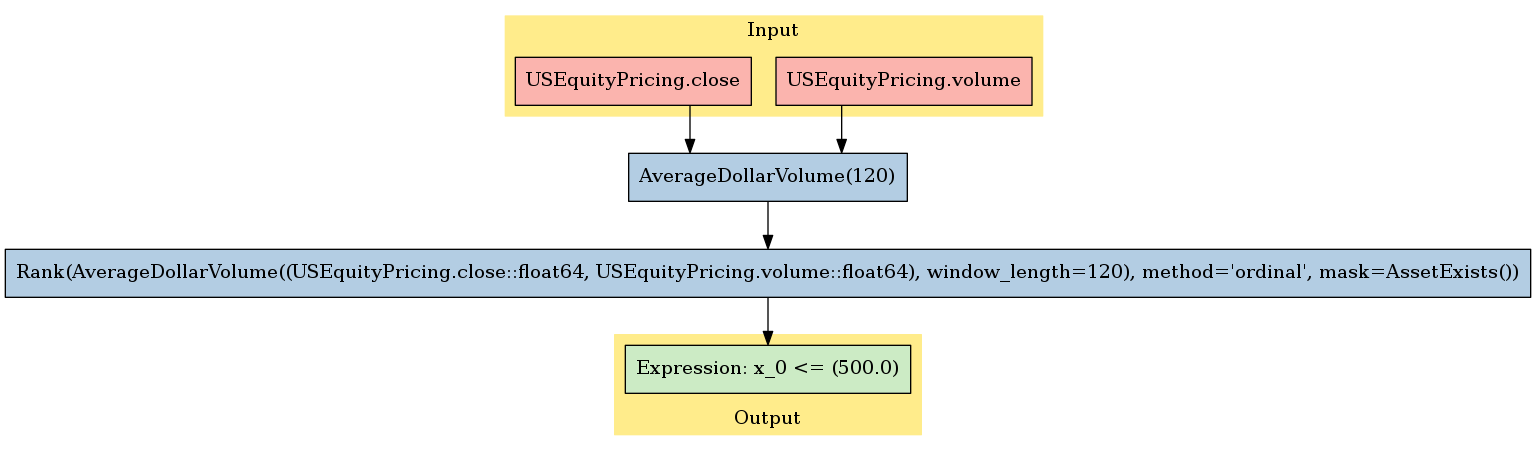

In [17]:
p.show_graph(format='png')

## run pipeline and view the factor data

In [18]:
df = engine.run_pipeline(p, factor_start_date, universe_end_date)

In [19]:
df.head()

Empty DataFrame
Columns: []
Index: [(2014-01-03 00:00:00+00:00, Equity(0 [A])), (2014-01-03 00:00:00+00:00, Equity(1 [AAL])), (2014-01-03 00:00:00+00:00, Equity(2 [AAP])), (2014-01-03 00:00:00+00:00, Equity(3 [AAPL])), (2014-01-03 00:00:00+00:00, Equity(4 [ABBV]))]

## Quiz 2
What do you notice about the factor values?

## Answer 2 here:

## Solution notebook
[The solution notebook is here.](rank_solution.ipynb)